In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('data/qsar_aquatic_toxicity.csv', delimiter=';')
X, y = data[:,:-1], data[:,-1]

Cassotti got to cut outliers so i do too

In [3]:
from sklearn.neighbors import KDTree

In [4]:
from sklearn.neighbors import DistanceMetric

In [5]:
kd = KDTree(X)

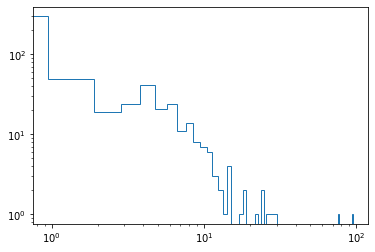

In [6]:
plt.hist([kd.query(X[i:i+1],k=2)[0][0,1] for i in range(len(X))], bins=100, histtype='step');
plt.yscale('log')
plt.xscale('log')

In [7]:
X.shape

(546, 8)

In [8]:
X.shape

(546, 8)

In [9]:
not_too_far = np.array([True if not x[0][0,1]>10 else False for x in [kd.query(X[i:i+1],2) for i in range(len(X))]])

In [10]:
np.array(sum(not_too_far) / X.shape[0]).round(3)

0.94

In [11]:
X, y = X[not_too_far], y[not_too_far]

In [12]:
with open('GPs.pkl', 'rb') as file:
    from pickle import load
    GPs = load(file)

/home/elliott/anaconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 0.23.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [13]:
GPs[:5],'', GPs[-5:]

([GaussianProcessRegressor(alpha=1e-05,
                           kernel=3.16**2 * Matern(length_scale=[66.4, 202, 3.56, 13.2, 4.95, 2.21, 4.47, 3.81], nu=1.5) + 5.73**2 * WhiteKernel(noise_level=0.0181),
                           random_state=42),
  GaussianProcessRegressor(alpha=1e-05,
                           kernel=3.16**2 * Matern(length_scale=[66.4, 202, 3.56, 13.2, 4.95, 2.21, 4.47, 3.81], nu=1.5) + 4.47**2 * WhiteKernel(noise_level=0.0297),
                           random_state=42),
  GaussianProcessRegressor(alpha=1e-05,
                           kernel=3.42**2 * Matern(length_scale=[68.8, 171, 8.83, 11.5, 3.45, 2.59, 5.5, 9.97e+04], nu=1.5) + 0.253**2 * WhiteKernel(noise_level=10.6),
                           random_state=42),
  GaussianProcessRegressor(alpha=1e-05,
                           kernel=3.48**2 * Matern(length_scale=[73.4, 228, 4.53, 14.2, 6.49, 2.87, 4.84, 6.32e-05], nu=1.5) + 5.48**2 * WhiteKernel(noise_level=0.0205),
                           random_s

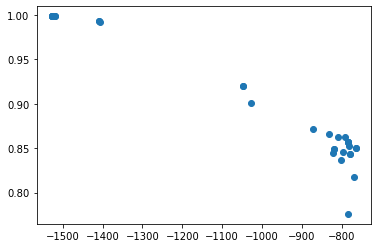

In [14]:
plt.scatter(np.array([x.log_marginal_likelihood_value_ for x in GPs]), np.array([z.score(X,y) for z in GPs]))

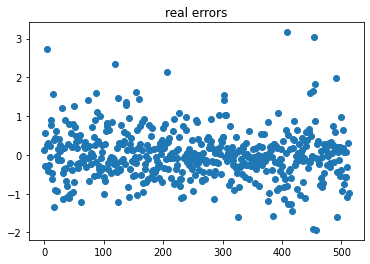

Text(0.5, 1.0, 'real errors / std')

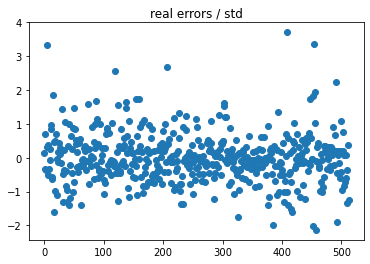

In [15]:
tmp = GPs[0]
y_pred, std_pred = tmp.predict(X, return_std=True)
plt.scatter(np.arange(len(y)), y-y_pred)
plt.title('real errors')
plt.show()
plt.scatter(np.arange(len(y)), (y-y_pred)/std_pred)
plt.title('real errors / std')


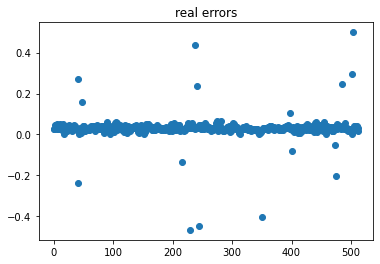

Text(0.5, 1.0, 'real errors / std')

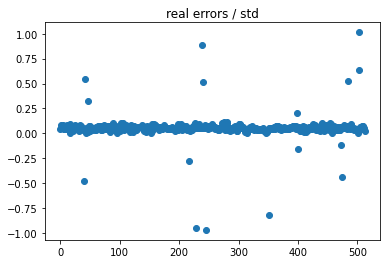

In [16]:
tmp = GPs[-1]
y_pred, std_pred = tmp.predict(X, return_std=True)
plt.scatter(np.arange(len(y)), y-y_pred)
plt.title('real errors')
plt.show()
plt.scatter(np.arange(len(y)), (y-y_pred)/std_pred)
plt.title('real errors / std')


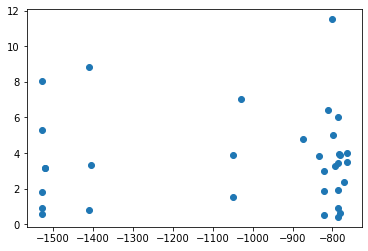

In [17]:
plt.scatter(np.array([x.log_marginal_likelihood_value_ for x in GPs]), np.array([np.abs(x.kernel.theta[-1]) for x in GPs]))

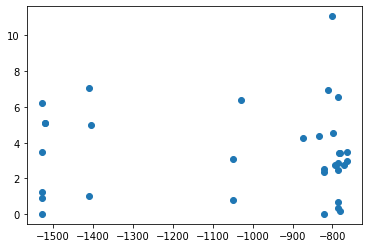

In [18]:
plt.scatter(np.array([x.log_marginal_likelihood_value_ for x in GPs]), np.array([np.abs(x.kernel.theta[-2]) for x in GPs]))

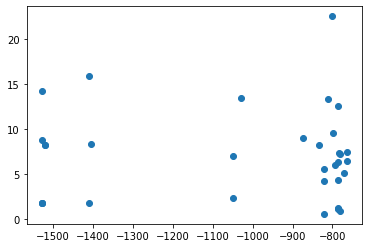

In [19]:
plt.scatter(np.array([x.log_marginal_likelihood_value_ for x in GPs]), np.array([np.abs(x.kernel.theta[-1]) + np.abs(x.kernel.theta[-2]) for x in GPs]))

In [20]:
[(i,GPs[i]) for i in np.where(np.array([x.kernel.theta[-1] for x in GPs])< -5)[0]]

[(12,
  GaussianProcessRegressor(alpha=1e-05,
                           kernel=3.85**2 * Matern(length_scale=[87.2, 220, 5.51, 12.2, 3.21, 4.13, 0.000128, 3e+04], nu=1.5) + 9.72**2 * WhiteKernel(noise_level=0.00654),
                           random_state=42)),
 (13,
  GaussianProcessRegressor(alpha=1e-05,
                           kernel=3.55**2 * Matern(length_scale=[53.3, 101, 9.97e+04, 6.28, 2.5e+04, 1e+05, 3.65, 0.000191], nu=1.5) + 254**2 * WhiteKernel(noise_level=1e-05),
                           random_state=42)),
 (20,
  GaussianProcessRegressor(alpha=1e-05,
                           kernel=4.97**2 * Matern(length_scale=[217, 0.000334, 7.67e+04, 10.4, 3.52e+04, 6.42e+04, 7.34, 0.0809], nu=1.5) + 24.6**2 * WhiteKernel(noise_level=0.000866),
                           random_state=42)),
 (25,
  GaussianProcessRegressor(alpha=1e-05,
                           kernel=4.93**2 * Matern(length_scale=[0.00106, 88.7, 4.05e+03, 0.000209, 0.685, 8.93e-05, 181, 7e-05], nu=1.5) + 33.7

In [21]:
[GPs[i].score(X,y) for i in np.where(np.array([x.kernel.theta[-1] for x in GPs])< -5)[0]]

[0.8462009096498251,
 0.8362273313859274,
 0.9005408588362521,
 0.9936088631443768,
 0.9985878678975157,
 0.998587867925558]

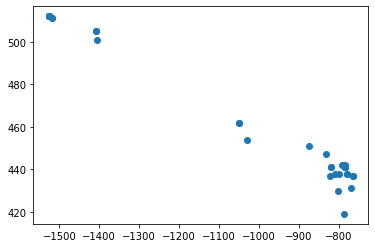

In [22]:
def get_sum(tmp):
    pred, std = tmp.predict(X,return_std=True)
    return np.sum(np.abs((y-pred)/std)<1)
plt.scatter(np.array([x.log_marginal_likelihood_value_ for x in GPs]), [get_sum(x) for x in GPs])

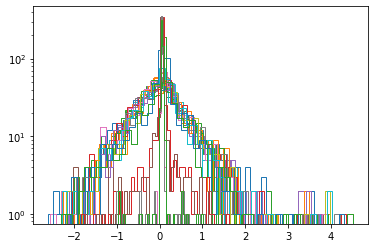

In [23]:
for i in range(len(GPs)):
    tmp = GPs[i]
    y_pred, std_pred = tmp.predict(X, return_std=True)
    plt.hist((y-y_pred)/std_pred, bins=50, histtype='step')
plt.yscale('log')

In [24]:
pred, std = GPs[0].predict(X, return_std=True)

In [25]:
std = std * (std_pred / std)

(array([  6.,   0.,  10.,   0.,   0.,   0.,   0.,   0.,   0., 497.]),
 array([0.4643077 , 0.47466446, 0.48502122, 0.49537798, 0.50573475,
        0.51609151, 0.52644827, 0.53680503, 0.5471618 , 0.55751856,
        0.56787532]),
 <a list of 10 Patch objects>)

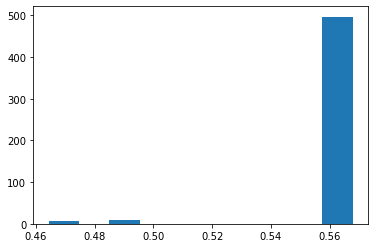

In [26]:
plt.hist(std)

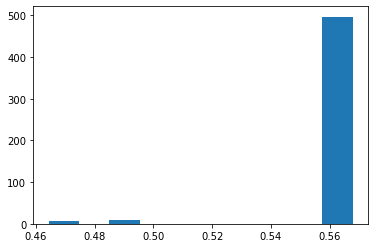

In [27]:
plt.hist(std_pred);

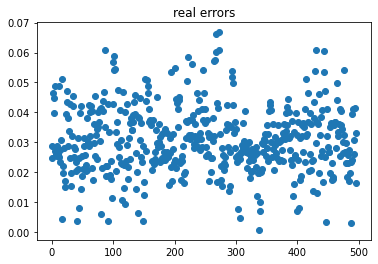

Text(0.5, 1.0, 'real errors / std')

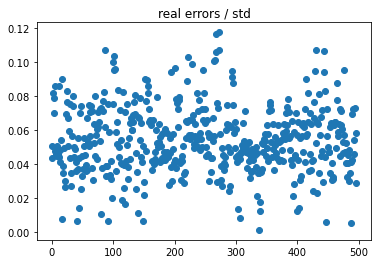

In [28]:
tmp = GPs[-1]
y_pred, std_pred = tmp.predict(X, return_std=True)
tmpy, tmpX = y[std_pred>.54], X[std_pred>.54]
y_pred, std_pred = tmp.predict(tmpX, return_std=True)

plt.scatter(np.arange(len(tmpy)), tmpy-y_pred)
plt.title('real errors')
plt.show()
plt.scatter(np.arange(len(tmpy)), (tmpy-y_pred)/std_pred)
plt.title('real errors / std')


In [29]:
kdTree = KDTree(X)

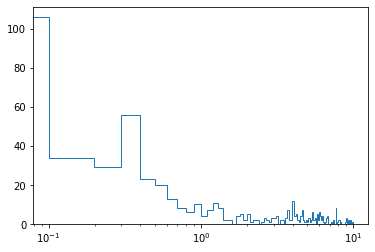

In [40]:
plt.hist([kd.query(X[i:i+1],k=2)[0][0,1] for i in range(len(X))], bins=100, histtype='step');
plt.xscale('log')

In [41]:
arr = np.array([kd.query(X[i:i+1],k=2)[0][0,1] for i in range(len(X))])

In [46]:
arr[np.where(arr<1e-5)[0]]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [47]:
np.where(arr<1e-5)[0]

array([ 40,  41,  47, 216, 229, 238, 241, 245, 351, 398, 400, 473, 474,
       484, 502, 503])

In [50]:
X[39:44]

array([[17.07 , 25.145,  0.   ,  1.947,  2.005,  1.276,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  3.267,  2.119,  1.25 ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  3.267,  2.119,  1.25 ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  3.374,  2.118,  1.204,  0.   ,  0.   ],
       [17.07 , 25.145,  0.   , -0.317,  1.155,  1.74 ,  0.   ,  0.   ]])

In [49]:
X[]

array([[17.07 , 25.145,  0.   ,  1.947,  2.005,  1.276,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  3.267,  2.119,  1.25 ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  3.267,  2.119,  1.25 ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  3.374,  2.118,  1.204,  0.   ,  0.   ]])

In [51]:
import pandas as pd

In [52]:
ls

dask_mpi.ipynb  data_reader.py  myGPR.py
dask_mpi.py     fit.py@         reading_results.ipynb
data/           GPs.pkl         sklearn_with_hgdl.py


In [70]:
data = pd.read_csv('data/qsar_aquatic_toxicity.csv', delimiter=';', header=None)

In [71]:
data.head()

,0,1,2,3,4,5,6,7,8
0,0.00,0.0,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.0,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.0,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.0,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.0,0,4.068,2.758,0.695,0,0,5.979


In [68]:
data.duplicated?

Signature:
data.duplicated(
    subset: Union[Hashable, Sequence[Hashable], NoneType] = None,
    keep: Union[str, bool] = 'first',
) -> 'Series'
Docstring:
Return boolean Series denoting duplicate rows.

Considering certain columns is optional.

Parameters
----------
subset : column label or sequence of labels, optional
    Only consider certain columns for identifying duplicates, by
    default use all of the columns.
keep : {'first', 'last', False}, default 'first'
    Determines which duplicates (if any) to mark.

    - ``first`` : Mark duplicates as ``True`` except for the first occurrence.
    - ``last`` : Mark duplicates as ``True`` except for the last occurrence.
    - False : Mark all duplicates as ``True``.

Returns
-------
Series
File:      ~/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py
Type:      method


In [81]:
data[0]

0       0.00
1       0.00
2       9.23
3       9.23
4       9.23
       ...  
541    24.06
542     9.23
543     0.00
544    13.14
545     0.00
Name: 0, Length: 546, dtype: float64

In [96]:
np.where(data.duplicated(subset=np.arange(8)).values[not_too_far])[0]

array([ 41, 216, 245, 351, 400, 474, 484, 502, 503])

In [47]:
np.where(arr<1e-5)[0]

array([ 40,  41,  47, 216, 229, 238, 241, 245, 351, 398, 400, 473, 474,
       484, 502, 503])

In [87]:
arr = np.where(data.duplicated(subset=np.arange(8)).values)[0]

In [94]:
for x in arr:
    print(data[x-1:x+2])
    print()

      0    1  2      3      4      5  6  7      8
44  0.0  0.0  0  3.267  2.119  1.250  0  0  4.867
45  0.0  0.0  0  3.267  2.119  1.250  0  0  5.373
46  0.0  0.0  0  3.374  2.118  1.204  0  0  3.522

         0     1  2      3      4      5  6  7      8
230   0.00   0.0  0  2.604  1.430  0.505  0  0  3.842
231   0.00   0.0  0  2.226  1.401  0.826  0  0  3.339
232  12.53  11.0  0  0.408  1.689  1.038  0  0  3.587

         0       1  2      3      4      5  6  7      8
260   0.00   0.000  0  5.989  2.733  0.529  0  0  6.989
261  26.02  32.897  2  2.729  1.975  0.462  1  0  4.742
262  29.46  53.683  1  3.842  2.887  0.614  0  0  6.109

          0        1  2      3      4      5  6  7      8
374  138.45  281.245  6  1.442  3.878  1.205  0  0  5.291
375   20.23   42.683  1  2.461  1.975  0.737  0  0  4.852
376   20.23   42.683  1  2.296  1.924  0.521  0  0  4.464

          0       1  2      3      4      5  6  7      8
428   12.89  16.786  0  3.051  2.727  0.800  1  0  4.851
429   12.8

In [72]:
data[30:50]

,0,1,2,3,4,5,6,7,8
30,12.47,14.124,0,3.827,3.362,1.373,1,0,5.102
31,0.00,0.000,0,2.226,1.265,0.570,0,0,3.718
32,0.00,14.960,0,2.026,1.265,0.722,0,0,3.577
33,45.61,28.269,0,3.012,2.557,0.901,1,0,6.458
34,12.03,18.011,1,1.587,1.654,1.732,1,0,2.352
35,86.81,121.412,3,0.709,2.938,1.416,2,0,2.958
36,132.42,196.332,2,4.478,4.984,1.087,4,0,5.440
37,40.46,85.367,2,5.255,3.001,0.485,0,0,4.838
38,0.00,0.000,0,5.453,2.837,0.735,0,0,6.858
39,20.23,42.683,1,3.921,2.494,1.229,0,0,6.360


# Conclusion:
## Models with low noise / good accuracy think they are doing well on duplicates, but ofc that is exactly where they are worst!
## Models with high noise / low accuracy have higher likelihoods because they account for duplication better, but ofc they suck at actually predicting